In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [84]:
df = pd.read_csv("heart.csv")
df.dropna(inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 1668
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       598 non-null    float64
 1   sex       598 non-null    float64
 2   cp        598 non-null    float64
 3   trestbps  598 non-null    float64
 4   chol      598 non-null    float64
 5   fbs       598 non-null    float64
 6   restecg   598 non-null    float64
 7   thalach   598 non-null    float64
 8   exang     598 non-null    float64
 9   oldpeak   598 non-null    float64
 10  slope     598 non-null    float64
 11  ca        598 non-null    float64
 12  thal      598 non-null    float64
 13  target    598 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 70.1 KB


In [77]:
df[['age','trestbps','chol','thalach','oldpeak']].describe

<bound method NDFrame.describe of        age  trestbps   chol  thalach  oldpeak
0     63.0     145.0  233.0    150.0      2.3
1     67.0     160.0  286.0    108.0      1.5
2     67.0     120.0  229.0    129.0      2.6
3     37.0     130.0  250.0    187.0      3.5
4     41.0     130.0  204.0    172.0      1.4
...    ...       ...    ...      ...      ...
1835  54.0     127.0  333.0    154.0      0.0
1836  62.0       NaN  139.0      NaN      NaN
1837  55.0     122.0  223.0    100.0      0.0
1838  58.0       NaN  385.0      NaN      NaN
1839  62.0     120.0  254.0     93.0      0.0

[1840 rows x 5 columns]>

In [17]:
df['target'].value_counts()

0    822
1    530
2    218
3    214
4     56
Name: target, dtype: int64

In [18]:
df['target'].value_counts(normalize = True)

0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: target, dtype: float64

In [19]:
df['target'].value_counts(normalize = True)*100

0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: target, dtype: float64

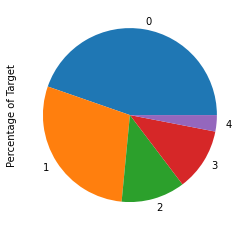

In [20]:
# Plot Target Distribution 
df.groupby("target")["age"].count().plot(kind="pie", y = 'target',label = 'Percentage of Target');

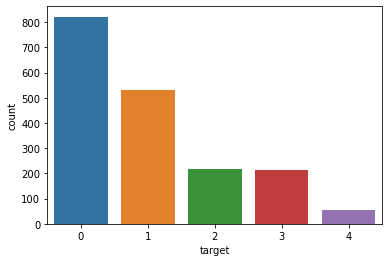

In [21]:
import seaborn as sns
sns.countplot(x="target", data=df)
plt.show();

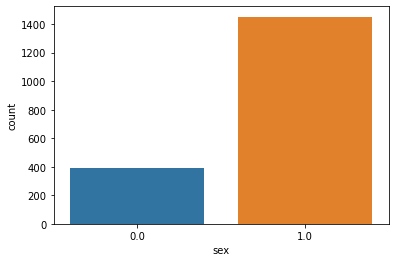

In [22]:
# Plot Gender Distribution 
sns.countplot(x="sex", data=df)
plt.show();

In [23]:
df['target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
1835     True
1836    False
1837    False
1838    False
1839     True
Name: target, Length: 1840, dtype: bool

In [24]:
df[df['target']!= 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,62.0,1.0,4.0,158,170,0,1,138,1,0,?,?,?,1
1834,46.0,1.0,4.0,134,310,0,0,126,0,0,?,?,3,2
1835,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1
1837,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2


In [29]:
df[df['target']== 1][['age','trestbps','chol','thalach','oldpeak']].describe()

,age
count,530.000000
mean,53.528302
std,8.732106
min,31.000000
25%,48.000000
50%,55.000000
75%,59.000000
max,75.000000


In [30]:
df[df['target']== 0][['age','trestbps','chol','thalach','oldpeak']].describe()

,age
count,822.000000
mean,50.547445
std,9.427953
min,28.000000
25%,43.000000
50%,51.000000
75%,57.000000
max,76.000000


In [31]:
pd.crosstab(df.sex,df.target)

target,0,1,2,3,4
sex,,,,,
0.0,288,60,20,16,4
1.0,534,470,198,198,52


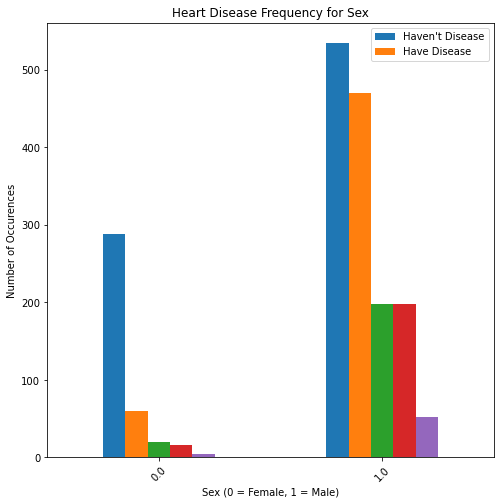

In [32]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(8,8))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=45)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Number of Occurences')
plt.show();

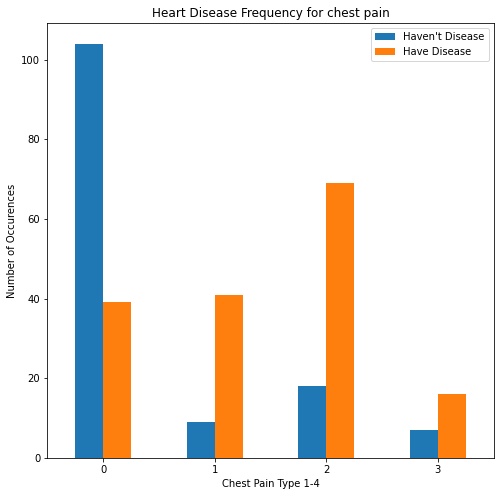

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(8,8))
plt.title('Heart Disease Frequency for chest pain')
plt.xlabel('Chest Pain Type 1-4')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Number of Occurences')
plt.show();

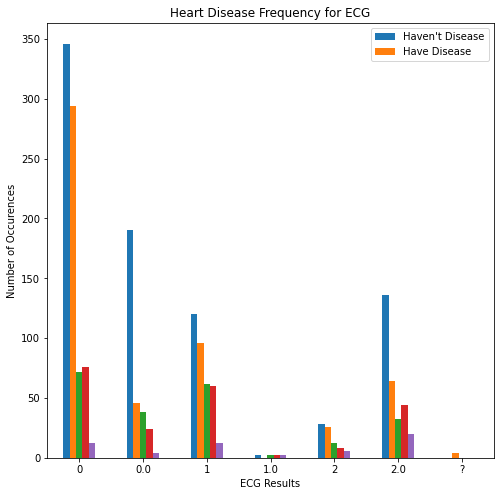

In [33]:
pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(8,8))
plt.title('Heart Disease Frequency for ECG')
plt.xlabel('ECG Results')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Number of Occurences')
plt.show();

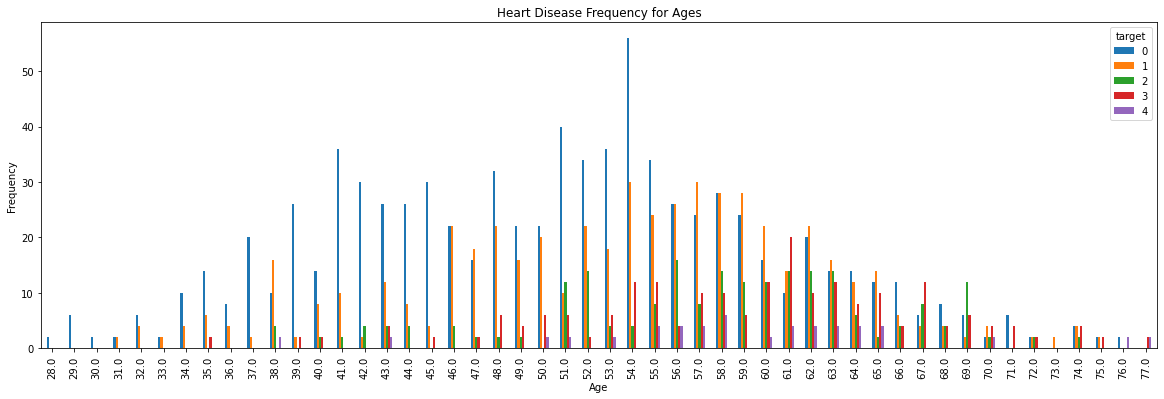

In [34]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:ylabel='Frequency'>

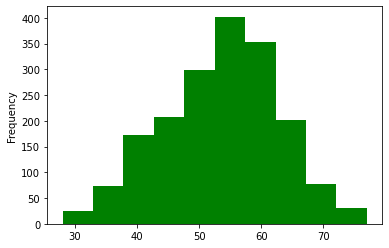

In [35]:
df['age'].plot(kind = 'hist', color = 'g')

In [36]:
df.corr()

,age,sex,cp,target
age,1.000000,0.056889,0.166245,0.339596
sex,0.056889,1.000000,0.170392,0.259342
cp,0.166245,0.170392,1.000000,0.397896
target,0.339596,0.259342,0.397896,1.000000


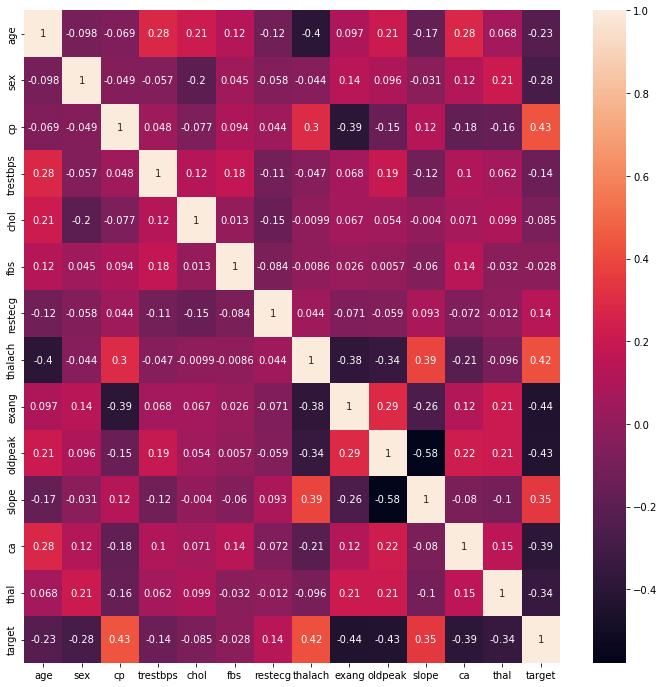

In [23]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot = True, ax = ax);

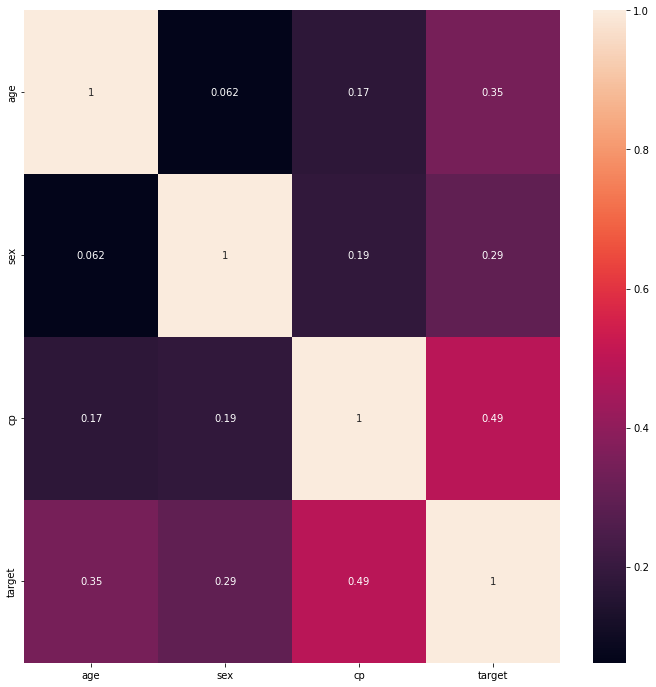

In [37]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(method = 'spearman'),annot = True, ax = ax);

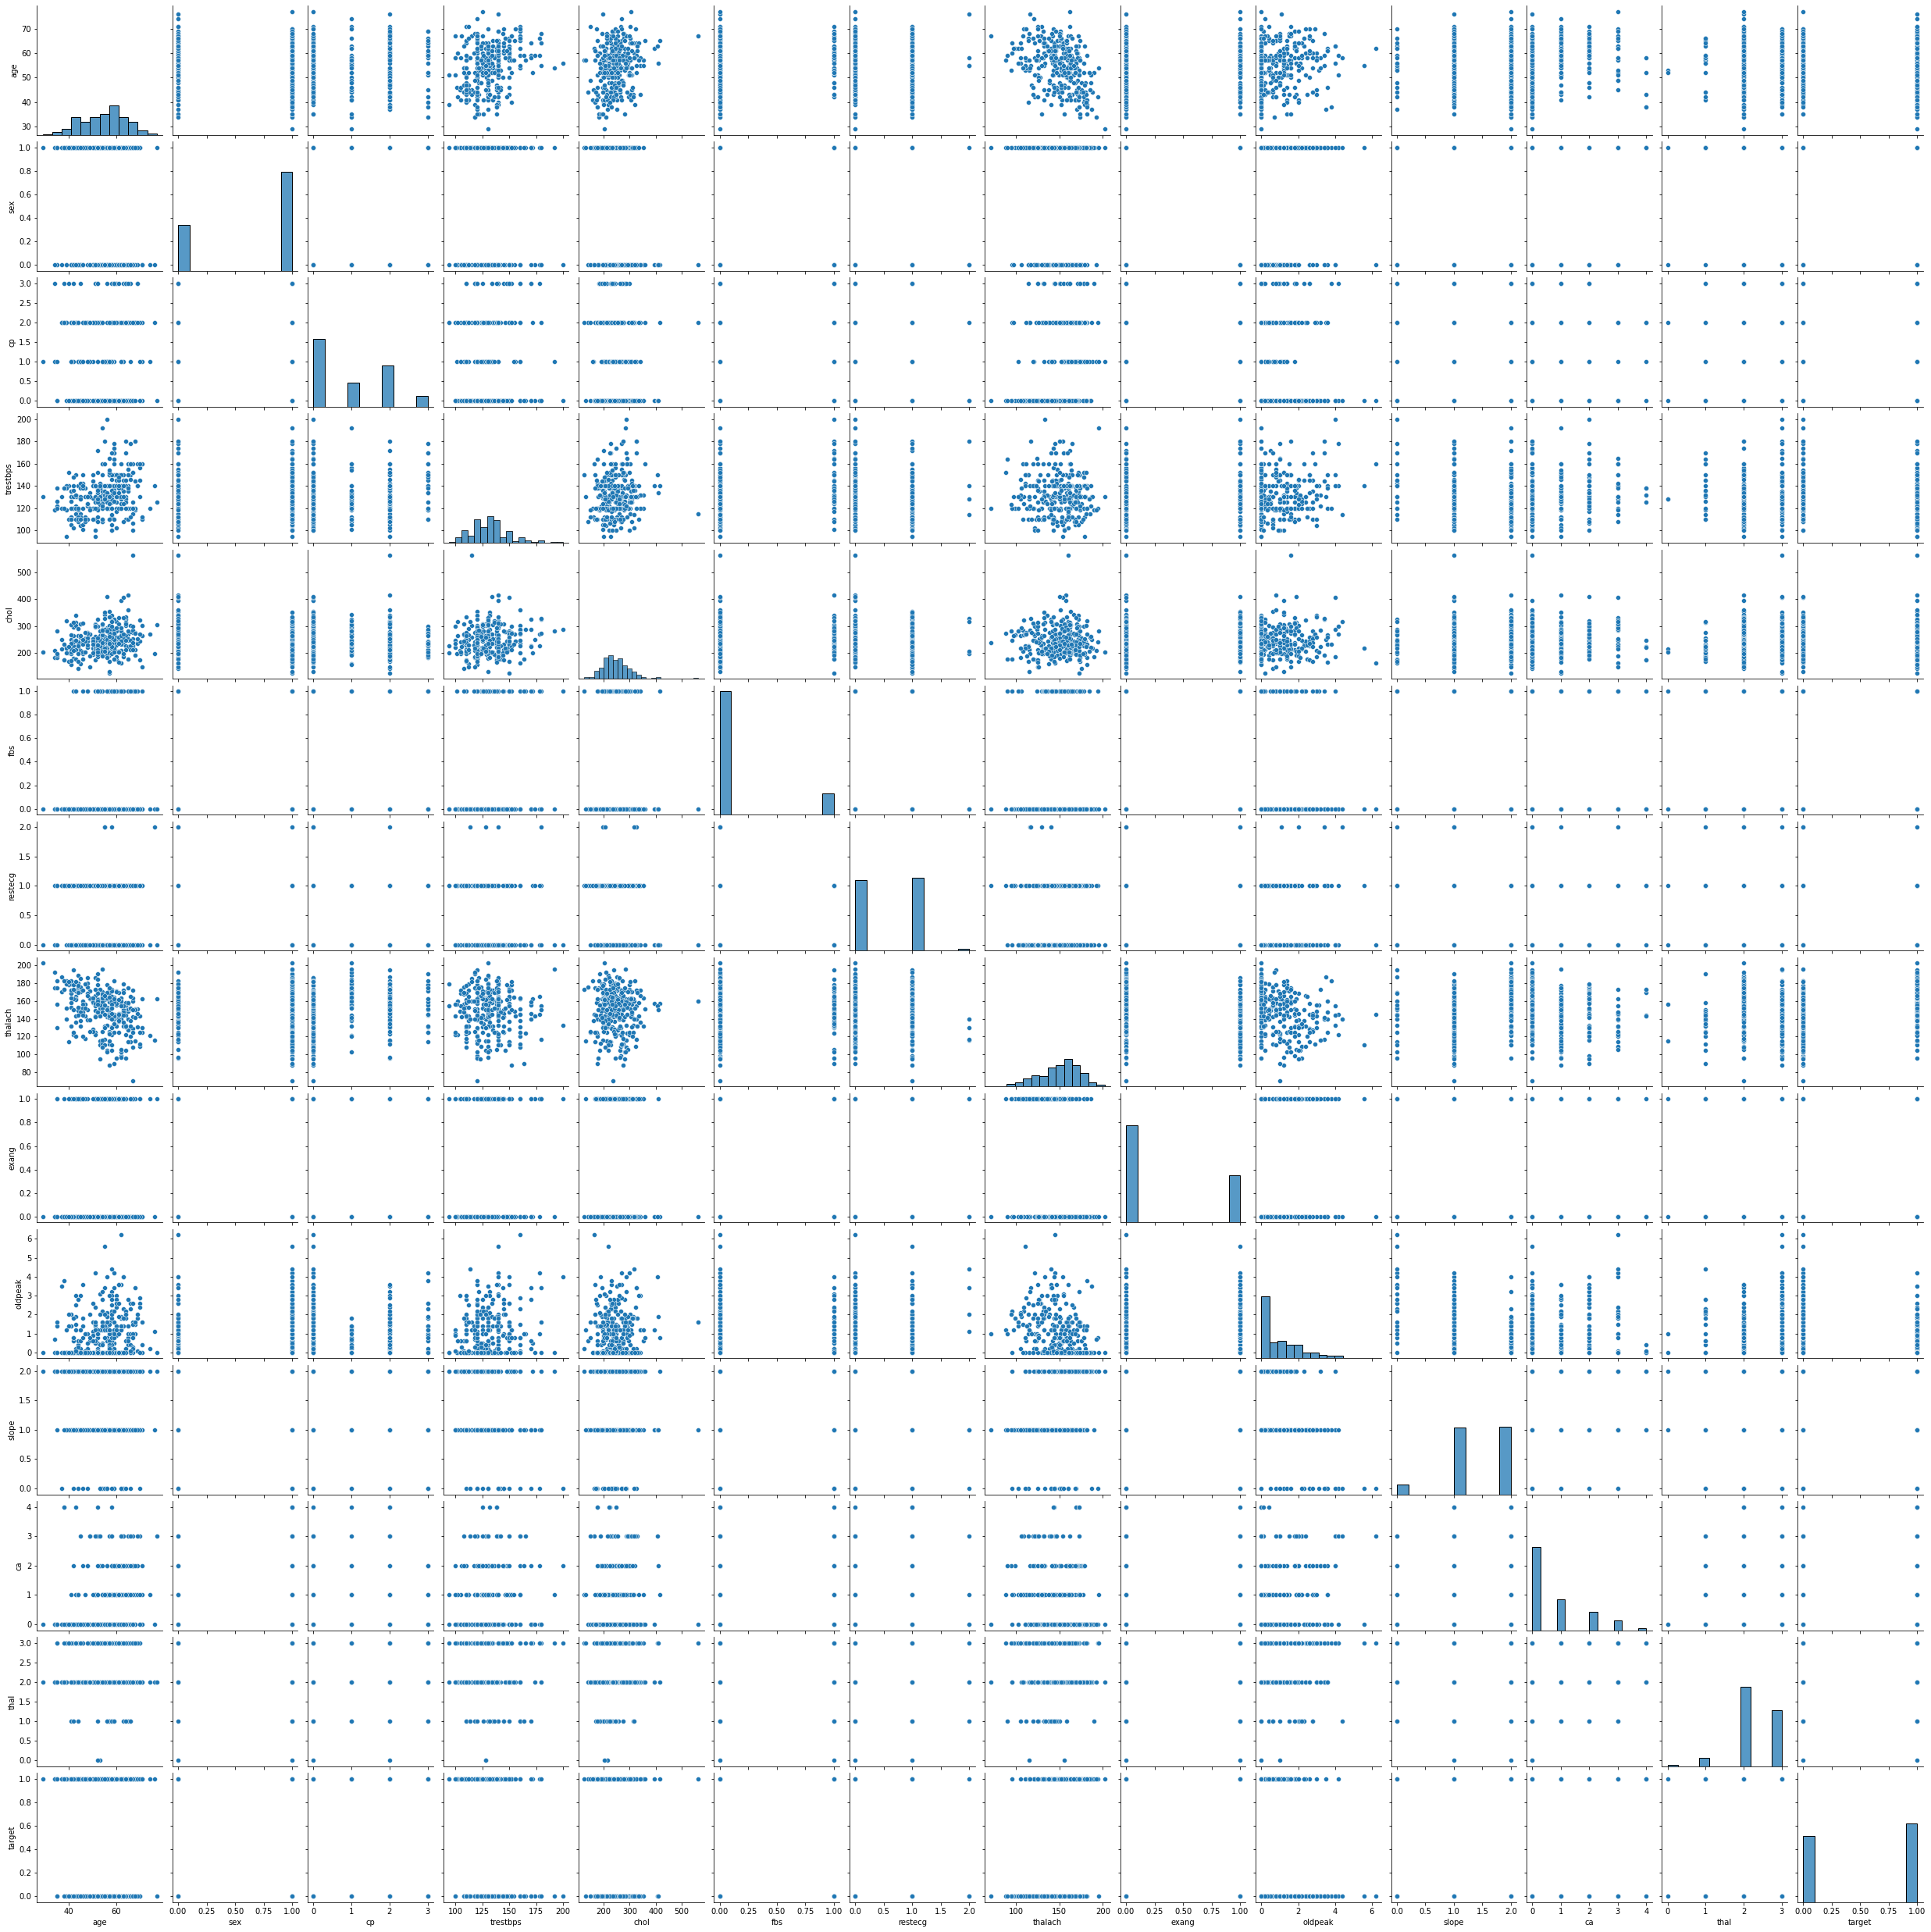

In [32]:
sns.pairplot(data = df)

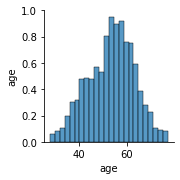

In [38]:
sns.pairplot(data = df[['age','trestbps','chol','thalach','oldpeak']]);

## Building the Classification Model 

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [86]:
y = df['target'].values
X = df.drop(['target'], axis = 1).values

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [90]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train,y_train)
lr_model.score(X_test, y_test)

0.5833333333333334

In [91]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
KNN_model.score(X_test, y_test)

0.43333333333333335

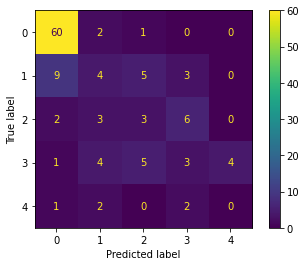

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_model,X_test,y_test)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.27      0.19      0.22        21
           2       0.21      0.21      0.21        14
           3       0.21      0.18      0.19        17
           4       0.00      0.00      0.00         5

    accuracy                           0.58       120
   macro avg       0.30      0.31      0.30       120
weighted avg       0.53      0.58      0.55       120



In [94]:
Final_Model = lr_model

In [95]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [103]:
import re
from tkinter import *
import tkinter as tk



def check_inputs():
    if age.get() == "":
        print("Age Field is Empty!!")
        Label(win,text="Age Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)


    elif rbp.get() == "":
        print("Resting Blood Pressure Field is Empty!!")
        Label(win,text="Resting Blood Pressure Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)

    elif chol.get() == "":
        print("Cholestrol Field is Empty!!")
        Label(win,text="Cholestrol Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)

    elif heart_rate.get() == "":
        print("Heart Rate Field is Empty!!")
        
        Label(win,text="Heart Rate Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)
    elif peak.get() == "":
        print("Depression By Exercise Field is Empty!!")
        Label(win,text="Depression By Exercise Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)

    else:
        predict()


def predict():
    gender_dict = {"Male":1, "Female":0}
    fbs_dict = {"True":1, "False":0}
    eia_dict = {"True":1, "False":0}
    cp_dict = {"1: typical angina":0,"2: atypical angina":1,"3: non-anginal pain":2,"4: asymptomatic":3}
    thal_dict = {"0: No Test":0,"1: Fixed Defect":1,"2: Normal Flow":2,"3: Reversible Defect":3}
    Pred_dict = {0:"Prediction: No Heart Disease Detected", 1:"Prediction: Heart Disease Deteced\nYou should consult with your Doctor!"}
    
    data = [float(age.get()),gender_dict[str(radio.get())], cp_dict[str(variable.get())], float(rbp.get()),
           float(chol.get()),fbs_dict[str(radio_fbs.get())], int(str(variable_ecg.get())) - 1 , float(heart_rate.get()),
           eia_dict[str(radio_eia.get())], float(peak.get()), int(str(variable_slope.get())) - 1,int(str(variable_n_vessels.get())) - 1,
           thal_dict[str(variable_thal.get())]]

    prediction = Final_Model.predict(np.array(data).reshape(1,13))
    pred_label = Pred_dict[prediction.tolist()[0]]
    Label(win,text=pred_label,fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)



def reset():
    age.set("")
    rbp.set("")
    chol.set("")
    heart_rate.set("")
    peak.set("")




win =  Tk()

win.geometry("450x600")
win.configure(background="#Eaedee")
win.title("Heart Disease Classifier")
# win.iconbitmap("icon.ico")

title = Label(win, text="Heart Disease Classifier", bg="#2583be", width="300", height="2", fg="white", font = ("Arial 20 italic")).pack()

age = Label(win, text="Age in Years", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=65)

rbp = Label(win, text="Resting Blood Pressure ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=105)

chol = Label(win, text="Cholestrol mg/dl ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=145)

heart_rate = Label(win, text="Maximum Heart Rate ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=185)

peak = Label(win, text="Depression By Exercise ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=225)


  
Gender = Label(win, text="Gender ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=265)

radio = StringVar()
Male = Radiobutton(win, text="Male",bg="#Eaedee",variable=radio,value="Male",font = ("Verdana 12")).place(x=160,y=265)
Female = Radiobutton(win, text="Female",bg="#Eaedee",variable=radio,value="Female",font = ("Verdana 12")).place(x=260,y=265)

FBS = Label(win, text="Fasting Blood Pressure ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=285)

radio_fbs = StringVar()
Male = Radiobutton(win, text="True",bg="#Eaedee",variable=radio_fbs,value="True",font = ("Verdana 12")).place(x=160,y=285)
Female = Radiobutton(win, text="False",bg="#Eaedee",variable=radio_fbs,value="False",font = ("Verdana 12")).place(x=260,y=285)

EIA = Label(win, text="Exercise Induced Angina",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=305)

radio_eia = StringVar()
Male = Radiobutton(win, text="True",bg="#Eaedee",variable=radio_eia,value="True",font = ("Verdana 12")).place(x=160,y=305)
Female = Radiobutton(win, text="False",bg="#Eaedee",variable=radio_eia,value="False",font = ("Verdana 12")).place(x=260,y=305)


cp = Label(win,text="Chest Pain ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=345)
variable = StringVar(win)
variable.set("CP")
w = OptionMenu(win, variable, "1: typical angina","2: atypical angina","3: non-anginal pain","4: asymptomatic")
w.place(x=140,y=345)

ecg = Label(win,text="Resting ECG ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=385)
variable_ecg = StringVar(win)
variable_ecg.set("ECG")
w_ecg = OptionMenu(win, variable_ecg, "1","2","3")
w_ecg.place(x=140,y=385)


exer_slope = Label(win,text="Slope of Exercise ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=425)
variable_slope = StringVar(win)
variable_slope.set("Slope")
w_slope = OptionMenu(win, variable_slope, "1","2","3")
w_slope.place(x=140,y=425)


thal_label = Label(win,text="Thallium Stress ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=465)
variable_thal = StringVar(win)
variable_thal.set("Thal")
w_thal = OptionMenu(win, variable_thal, "0: No Test","1: Fixed Defect","2: Normal Flow","3: Reversible Defect")
w_thal.place(x=140,y=465)


n_vessels = Label(win,text="Number Vessels ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=505)
variable_n_vessels = StringVar(win)
variable_n_vessels.set("N_Vessels")
w_n_vessels = OptionMenu(win, variable_n_vessels, "1","2","3","4")
w_n_vessels.place(x=140,y=505)


age = StringVar()
rbp = StringVar()
chol = StringVar()
heart_rate = StringVar()
peak  = StringVar()
Gender = StringVar()
FBS  = StringVar()
EIA  = StringVar()
cp  = StringVar()
ecg  = StringVar()
exer_slope  = StringVar()
thal_label  = StringVar()
n_vessels  = StringVar()

entry_age = Entry(win,textvariable = age,width=30)
entry_age.place(x=150,y=65)

entry_rbp = Entry(win,textvariable = rbp,width=30)
entry_rbp.place(x=150,y=105)

entry_chol = Entry(win,textvariable = chol,width=30)
entry_chol.place(x=150,y=145)

entry_heart_rate = Entry(win, textvariable = heart_rate,width=30)
entry_heart_rate.place(x=150,y=185)

entry_peak = Entry(win,textvariable = peak,width=30)
entry_peak.place(x=150,y=225)

reset = Button(win, text="Reset", width="12",height="1",activebackground="red",command=reset, bg="Pink",font = ("Calibri 12 ")).place(x=24, y=540)
submit = Button(win, text="Classify", width="12",height="1",activebackground="violet", bg="Pink",command=check_inputs,font = ("Calibri 12 ")).place(x=240, y=540)


win.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/osama/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_127188/3716120184.py", line 30, in check_inputs
    predict()
  File "/tmp/ipykernel_127188/3716120184.py", line 41, in predict
    data = [float(age.get()),gender_dict[str(radio.get())], cp_dict[str(variable.get())], float(rbp.get()),
KeyError: 'CP'
